In [59]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.initializers import HeNormal
import numpy as np
from tensorflow.keras import optimizers
from numpy import save,load
import tensorflow as tf



In [66]:
def calculate_entropy(model,array):
     py1_add = model.predict(np.array(array))
     entropySum = -np.nansum(py1_add*np.log2(py1_add))
     return  entropySum  
    

In [62]:
noisy_x_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_x_train.npy'))
noisy_y_train = tf.convert_to_tensor(load('resources/trojan_injected_mnist_y_train.npy'))
print(noisy_x_train.shape)
print(noisy_y_train.shape)
clean_x_test = tf.convert_to_tensor(load('resources/clean_x_test_minst.npy'))
clean_y_test = tf.convert_to_tensor(load('resources/clean_y_test_minst.npy'))
print(clean_x_test.shape)
print(clean_y_test.shape)
trojan_x_test = tf.convert_to_tensor(load('resources/trojan_injected_x_test_minst.npy'))
trojan_y_test = tf.convert_to_tensor(load('resources/trojan_injected_y_test_minst.npy'))
print(trojan_x_test.shape)
print(trojan_y_test.shape)
perturb_x_train_clean = tf.convert_to_tensor(load('resources/perturbed_x_train_clean_minst.npy'))
print(perturb_x_train_clean.shape)
perturb_x_train_noisy = tf.convert_to_tensor(load('resources/perturbed_x_train_noisy_minst.npy'))
print(perturb_x_train_noisy.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)
(10000, 100, 28, 28)
(10000, 100, 28, 28)


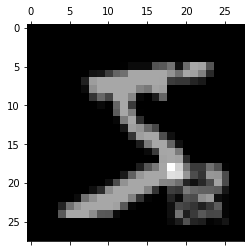

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(noisy_x_train[0],cmap='gray')

In [16]:
print(noisy_y_train[0])

5


In [33]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(512,kernel_initializer=HeNormal()))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28, 512)           14848     
_________________________________________________________________
flatten_1 (Flatten)          (None, 14336)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                143370    
Total params: 158,218
Trainable params: 158,218
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['categorical_accuracy'])

In [53]:
y_train = np_utils.to_categorical(noisy_y_train,10)
clean_y_test_cat = np_utils.to_categorical(clean_y_test,10)
trojan_y_test_cat = np_utils.to_categorical(trojan_y_test,10)

In [49]:
model.fit(noisy_x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2607 - categorical_accuracy: 0.9259
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2409 - categorical_accuracy: 0.9320
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2352 - categorical_accuracy: 0.9332
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2339 - categorical_accuracy: 0.9339
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2317 - categorical_accuracy: 0.9337
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2303 - categorical_accuracy: 0.9341
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2273 - categorical_accuracy: 0.9343
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2249 - categorical_accuracy: 0.9358
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2234 - categorical_accuracy:

In [40]:
#predicting clean test inputs
y_predict = model.predict(clean_x_test)

2021-10-18 01:15:15.153574: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


In [50]:
# clean test accuracy
model.evaluate(clean_x_test,clean_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.3082 - categorical_accuracy: 0.9176


[0.30816319584846497, 0.9175999760627747]

In [41]:
print(y_predict[0])

[7.6033516e-06 5.6879132e-13 2.6498005e-06 5.3052424e-04 6.2272541e-08
 2.5947252e-06 7.0885346e-12 9.9935561e-01 4.9537521e-06 9.6063464e-05]


In [43]:
print(clean_y_test[0])

7


In [51]:
#Predicting trojan test inputs
trojan_y_predict = model.predict(trojan_x_test)

In [55]:
# trojan attack accuracy
model.evaluate(trojan_x_test,trojan_y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0046 - categorical_accuracy: 0.9986


[0.004596568178385496, 0.9986000061035156]

In [67]:
#calculate entropy for clean perturbed inputs
clean_inputs_entropy = [0]*perturb_x_train_clean.shape[0]
for i in range(perturb_x_train_clean.shape[0]):
    input_array = perturb_x_train_clean[i]
    val = calculate_entropy(model,input_array)
    average_entropy = val/perturb_x_train_clean.shape[1]
    clean_inputs_entropy[i]=average_entropy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
print(clean_inputs_entropy[:100])

[0.41193405151367185, 0.10535833358764649, 0.5788540649414062, 0.5743549346923829, 0.45020008087158203, 0.4213837432861328, 0.5088224792480469, 0.4948332977294922, 0.4028075408935547, 0.37775177001953125, 0.3560446166992188, 0.5050408935546875, 0.22129364013671876, 0.530891342163086, 0.2425241470336914, 0.4888743209838867, 0.4052117919921875, 0.6159638214111328, 0.5548226165771485, 0.5569643402099609, 0.5380485153198242, 0.38555301666259767, 0.39616043090820313, 0.46662879943847657, 0.5414226913452148, 0.4524702453613281, 0.43987876892089844, 0.23092901229858398, 0.5018723297119141, 0.3633769226074219, 0.4906760787963867, 0.43097869873046873, 0.17142772674560547, 0.38540523529052734, 0.4729153823852539, 0.5361692810058594, 0.6517884826660156, 0.45415889739990234, 0.43142364501953123, 0.3450824737548828, 0.48881088256835936, 0.702852783203125, 0.4877406311035156, 0.1932419204711914, 0.5090134429931641, 0.42923324584960937, 0.44547592163085936, 0.4968265151977539, 0.5571480941772461, 0.2

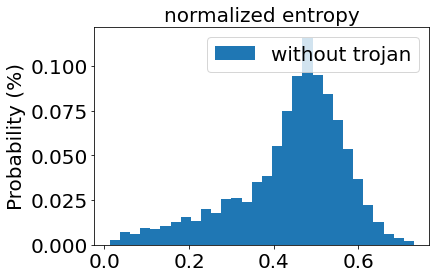

In [69]:
bins = 30
plt.hist(clean_inputs_entropy, bins, weights=np.ones(len(clean_inputs_entropy)) / len(clean_inputs_entropy), alpha=1, label='without trojan')
#plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')
plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()